# Trabalho 03 - Resistência dos Materiais MAC015 - Turma X 2024.3
___

- Ana Beatriz Lana Maciel Moreira Armond (202165501B)
- Gabriella Cruz e Silva (202165512B)

In [ ]:
# Importando Bibliotecas
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Atividade 02
___

Com base no Problema 01 da Atividade 02, desenvolva uma rotina computacional para calcular
as máximas tensões de tração e de compressão, provocadas pelo momento fletor, na seção mais
solicitada da viga.

OBS: utilizar a rotina desenvolvida no Problema 01 da Atividade 03 para cálculo do momento
de inércia da seção transversal. Arbitrar o módulo de elasticidade do material.

## Relatório da Atividade

Tensões Normais
As tensões normais (compressão e tensão/tração) são calculadas com base na fórmula:

$σ = \frac{M*d}{I}$

onde:

- $M$ é o momento fletor
- $d$ é a distância do ponto em relação à linha neutra,
- $I$ é o momento de inércia da seção.

E levamos em consideração que:

- $M > 0$
  - Fibras Superiores em relação à Linha Neutra sofrem compressão
  - Fibras Inferiores em relação à Linha Neutra sofrem tensão

- $M < 0$
  - Fibras Superiores em relação à Linha Neutra sofrem tensão
  - Fibras Inferiores em relação à Linha Neutra sofrem compressão

## Bibliotecas Utilizadas

- numpy: Usada em operações com vetores e entre outros tipos de variáveis.

- sympy: Utilizada para manipulação simbólica, especialmente no cálculo das forças verticais e momentos totais gerados pelos carregamentos, bem como na solução do sistema de equações de equilíbrio estático.

- matplotlib: Usada para criar gráficos e desenhar a viga, os apoios e os carregamentos.

## Estrutura do Código (Principais Mudanças)

### Código da Atividade 01 do Trabalho 03
Foram adidionadas duas novas funções:
- `get_max_min_y(self)`: Determina os valores máximos e mínimos da coordenada
y dos retângulos em uma seção composta.
- `get_y_top_bottom(self)`: Calcula as distâncias entre o centroide da seção e os extremos superior e inferior.

Também foram feitas modificações no plot para mostrar qual parte é submetida a compressão ou tensão. As cores também foram modificadas para evitar composição de cores que dificultem a visualização da seção.

### Código da Atividade 01 do Trabalho 02
Na classe Beam adicionamos os atributos E (módulo de elasticidade) e section, que define a seção transversal da viga.
Novas funções foram implementadas ainda na classe Beam:
- `find_max_bending_moment(self)`: dentro da lista de segmentos de função do momento fletor, essa função busca o valor absoluto máximo, pois então sabemos qual a seção mais solicitada da viga.
- `calculate_max_stresses(self)`: calcula as tensões máximas em uma viga com base no momento fletor máximo encontrado.

Muitas mudanças foram feitas na plotagem da viga para que fosse possível ver a linha neutra e onde havia compressão ou tensão (fibras superiores ou inferiores).

Entre outras menores mudanças para correção de detalhes e oragnização de código também foram feitas.

In [ ]:
# Classe que representa um retângulo com algumas propriedades, como largura, altura e posição
class Rectangle:
    def __init__(self, width, height, x_center, y_center, negative=False):
        self.width = width  # Largura do retângulo
        self.height = height  # Altura do retângulo
        self.x_center = x_center  # Posição X do centro
        self.y_center = y_center  # Posição Y do centro
        self.area = width * height  # Área do retângulo
        self.negative = negative  # Indica se o retângulo é "negativo" (por exemplo, um recorte na seção)

    # Cálculo do momento de inércia em torno do eixo X (momento de inércia para um retângulo)
    def moment_of_inertia_x(self):
        return (self.width * self.height**3) / 12

    # Cálculo do momento de inércia em torno do eixo Y (momento de inércia para um retângulo)
    def moment_of_inertia_y(self):
        return (self.height * self.width**3) / 12

    # Cálculo do produto de inércia (momento de inércia misto)
    def product_of_inertia(self):
        return (self.width**2 * self.height**2) / 12

# Classe para representar uma seção composta por vários retângulos
class CompositeSection:
    def __init__(self, rectangles):
        self.rectangles = rectangles  # Lista de retângulos que compõem a seção
        # Calcula o centroide da seção (média ponderada das posições dos centros dos retângulos)
        self.x_centroid = self.calculate_centroid_x()
        self.y_centroid = self.calculate_centroid_y()

    # Cálculo do centroide no eixo X da seção composta
    def calculate_centroid_x(self):
        sum_moments = sum(r.x_center * r.area for r in self.rectangles)  # Soma dos momentos em X
        sum_areas = sum(r.area for r in self.rectangles)  # Soma das áreas dos retângulos
        return sum_moments / sum_areas  # Centroide em X é a média ponderada das posições

    # Cálculo do centroide no eixo Y da seção composta
    def calculate_centroid_y(self):
        sum_moments = sum(r.y_center * r.area for r in self.rectangles)  # Soma dos momentos em Y
        sum_areas = sum(r.area for r in self.rectangles)  # Soma das áreas dos retângulos
        return sum_moments / sum_areas  # Centroide em Y é a média ponderada das posições

    # Cálculo do momento de inércia em torno do eixo X para a seção composta
    def moment_of_inertia_x(self):
        return sum(r.moment_of_inertia_x() + r.area * ((r.y_center - self.y_centroid) ** 2) for r in self.rectangles)

    # Cálculo do momento de inércia em torno do eixo Y para a seção composta
    def moment_of_inertia_y(self):
        return sum(r.moment_of_inertia_y() + r.area * ((r.x_center - self.x_centroid) ** 2) for r in self.rectangles)

    # Cálculo do produto de inércia (momento de inércia misto) para a seção composta
    def product_of_inertia(self):
        if len(self.rectangles) == 1:
          return 0  # Produto de inércia é zero para um único retângulo alinhado

        return sum((-1 if r.negative else 1) * (r.product_of_inertia() + r.area * (r.x_center - self.x_centroid) * (r.y_center - self.y_centroid)) for r in self.rectangles)

    def get_max_min_y(self):
        top_edges = [r.y_center + r.height/2 for r in self.rectangles]
        bottom_edges = [r.y_center - r.height/2 for r in self.rectangles]
        max_y = max(top_edges) if top_edges else 0
        min_y = min(bottom_edges) if bottom_edges else 0
        return max_y, min_y

    def get_y_top_bottom(self):
        max_y, min_y = self.get_max_min_y()
        y_top = max_y - self.y_centroid
        y_bottom = self.y_centroid - min_y
        return y_top, y_bottom

    def plot_section(self, bending_moment_sign=1, show_stress_zones=False):
        fig, ax = plt.subplots()
        for r in self.rectangles:
            x_bottom_left = r.x_center - r.width / 2
            y_bottom_left = r.y_center - r.height / 2
            color = 'white' if r.negative else 'gray'
            rect = plt.Rectangle((x_bottom_left, y_bottom_left), r.width, r.height,
                               facecolor=color, edgecolor='black', alpha=0.5)
            ax.add_patch(rect)
            plt.plot(r.x_center, r.y_center, 'ro')

        plt.plot(self.x_centroid, self.y_centroid, 'bo', label='Centróide')

        if show_stress_zones:
            x_left = min(r.x_center - r.width/2 for r in self.rectangles)
            x_right = max(r.x_center + r.width/2 for r in self.rectangles)
            max_y, min_y = self.get_max_min_y()

            if bending_moment_sign >= 0:
                top_color, bottom_color = 'pink', 'yellow'
                top_label, bottom_label = 'Compressão', 'Tensão'
            else:
                top_color, bottom_color = 'yellow', 'pink'
                top_label, bottom_label = 'Tensão', 'Compressão'

            # Fill stress zones
            ax.fill_betweenx([self.y_centroid, max_y], x_left, x_right,
                            color=top_color, alpha=0.3, label=top_label)
            ax.fill_betweenx([min_y, self.y_centroid], x_left, x_right,
                            color=bottom_color, alpha=0.3, label=bottom_label)
            ax.axhline(self.y_centroid, color='green', linestyle='--', label='Linha Neutra')

        plt.xlabel("X")
        plt.ylabel("Y")
        plt.grid()
        plt.axis("equal")
        plt.legend()
        plt.show()

In [ ]:
# Classe que representa os apoios na viga, responsáveis por gerar reações
class Support:
    def __init__(self, rx, ry, rm, position, label):
        # Restrições nos eixos X, Y e momento
        self.rx = rx
        self.ry = ry
        self.rm = rm
        # Posição do apoio na viga
        self.position = position
        # Rótulo para identificação do apoio
        self.label = label

    # Representação do apoio, mostrando restrições e reações calculadas
    def __repr__(self):
        return (f"\nApoio {self.label}:\n"
                f"  Posição: {self.position}\n"
                f"  Restrições: Rx={self.rx}, Ry={self.ry}\n")

class Force:
  def __init__(self, magnitude, position, label):
    self.magnitude = magnitude
    self.position = position
    self.label = label

  @property
  def force_moment(self):
    return self.magnitude * self.position

  def __repr__(self):
      return (f"\nForça {self.label}:\n"
              f"   Magnitude: {self.magnitude}\n"
              f"   Posição: {self.position}\n")

# Classe base para carregamentos distribuídos (usada por cargas constantes e lineares)
class Load:
    def __init__(self, start, end, label):
        self.start = start          # Posição inicial do carregamento
        self.end = end              # Posição final do carregamento
        self.label = label          # Rótulo para identificação
        self.x = sp.symbols('x')    # Variável simbólica para integração

    @property
    # Retorna a função simplificada do carregamento
    def load_function(self):
        simplified_function = self.function.subs(self.variables)
        return simplified_function.subs({self.x: self.x - self.start}) if simplified_function.has(self.x) else simplified_function

    @property
    # Calcula a força total vertical como a integral do carregamento
    def total_force_y(self):
        return sp.integrate(self.load_function, (self.x, self.start, self.end))

    @property
    # Calcula o momento total gerado pelo carregamento
    def total_moment(self):
        return sp.integrate(self.load_function * self.x, (self.x, self.start, self.end))

    # Avalia a carga em um ponto específico
    def __call__(self, x):
        return self.load_function.subs({self.x: x})

    # Função cortante para carregamentos distribuídos
    def shear_function(self, x):
      w_at_point_x = self(x)
      wx = sp.integrate(sp.diff(self.function, self.x), self.x)
      aux = wx + w_at_point_x
      return sp.integrate(aux.subs(self.variables), self.x)

    # Representação do carregamento, mostrando ponto inicial e final
    def __repr__(self):
        return (f"\nCarregamento {self.label}:\n"
                f"  Início: {self.start}\n"
                f"  Fim: {self.end}\n")

# Classe para carregamentos constantes
class ConstantLoad(Load):
    def __init__(self, start, end, label, intensity):
        self.intensity = intensity                      # Intensidade constante do carregamento
        self.variables = {sp.symbols('a'): intensity}   # Variável simbólica associada
        super().__init__(start, end, label)

    @property
    # Função constante do carregamento
    def function(self):
        return sp.symbols('a')

    # Adiciona a intensidade à representação do carregamento
    def __repr__(self):
        base_repr = super().__repr__()
        return base_repr + f"  Intensidade Constante: {self.intensity}\n"

# Classe para carregamentos lineares
class LinearLoad(Load):
    def __init__(self, start, end, label, start_intensity, end_intensity):
        # Intensidade no início do carregamento
        self.start_intensity = start_intensity
        # Intensidade no final do carregamento
        self.end_intensity = end_intensity
        # Cálculo da inclinação e do termo constante da função linear
        self.slope = (end_intensity - start_intensity) / (end - start)
        self.intercept = start_intensity
        self.variables = {
            sp.symbols('a'): self.slope,
            sp.symbols('b'): self.intercept
        }
        super().__init__(start, end, label)

    @property
    # Função linear que descreve o carregamento
    def function(self):
        return sp.symbols('a') * self.x + sp.symbols('b')

    # Adiciona as intensidades inicial e final à representação do carregamento
    def __repr__(self):
        base_repr = super().__repr__()
        return (base_repr +
                f"  Intensidade Inicial: {self.start_intensity}\n"
                f"  Intensidade Final: {self.end_intensity}\n")

# Classe para representar a viga como um sistema completo
class Beam:
    def __init__(self, length, forces=None, loads=None, supports=None, E=None, section=None):
        self.length = length                             # Comprimento total da viga
        self.forces = forces if forces else []           # Forças aplicadas
        self.loads = loads if loads else []              # Lista de carregamentos
        self.supports = supports if supports else []     # Lista de apoios
        self.x = sp.symbols('x')                         # Variável simbólica para análise
        self.E = E                                       # Módulo de Elasticidade do Material
        self.section = section                           # Seção Transversal da Viga

    # Adiciona uma força à viga
    def add_force(self, force):
        self.forces.append(force)

    # Adiciona um carregamento à viga
    def add_load(self, load):
        self.loads.append(load)

    # Adiciona um apoio à viga
    def add_support(self, support):
        self.supports.append(support)

    # Soma das forças verticais dos carregamentos
    def total_vertical_forces(self):
        return sum(load.total_force_y for load in self.loads)

    # Soma dos momentos gerados por carregamentos
    def total_load_moments(self):
        return sum(load.total_moment for load in self.loads)

    # Soma das forças
    def total_forces(self):
        return sum(force.magnitude for force in self.forces)

    # Soma dos momentos das forças
    def total_force_moments(self):
        return sum(force.force_moment for force in self.forces)

    # Calcula as reações nos apoios com base no equilíbrio estático
    def calculate_support_reactions(self):
        total_fy = self.total_vertical_forces() + self.total_forces()
        total_m = self.total_load_moments() + self.total_force_moments()

        # Criação de variáveis simbólicas para reações
        reaction_y_symbols = [sp.symbols(f"R_{support.label}y") for support in self.supports if support.ry]
        reaction_m_symbols = [sp.symbols(f"R_{support.label}m") for support in self.supports if support.rm]

        # Termos de momento gerados pelas reações verticais
        moment_terms = [sp.symbols(f"R_{support.label}y") * support.position for support in self.supports if support.ry]

        # Equações de equilíbrio (força e momento)
        eq_fy = sp.Eq(total_fy + sum(reaction_y_symbols), 0)
        eq_m = sp.Eq(total_m + sum(moment_terms) + sum(reaction_m_symbols), 0)

        # Resolução do sistema de equações
        solutions = sp.solve((eq_fy, eq_m), reaction_y_symbols + reaction_m_symbols)

        # Atualiza as reações calculadas nos apoios
        for support in self.supports:
            support.reaction_y = solutions.get(sp.symbols(f"R_{support.label}y"), 0)
            support.reaction_m = solutions.get(sp.symbols(f"R_{support.label}m"), 0)

        return solutions

    # Lista de Pontos de interesse
    def points(self):

      points = [force.position for force in self.forces] + \
               [load.start for load in self.loads] + \
               [load.end for load in self.loads] + \
               [support.position for support in self.supports]

      return sorted(list(set(points)))

    # Calcula a força cortante V(x)
    def shear_force(self, points):
        V_forces = []             # Lista para armazenar os valores da força cortante em cada trecho
        last_force_point = None   # Variável para armazenar a força cortante do último ponto avaliado
        x = sp.symbols('x')       # Define a variável simbólica 'x' para expressões simbólicas do SymPy
        last_end = None

        # Iteração pelos trechos da viga
        # Exemplo: se L = 10 -> [start, end] = [(0,2), (2,5), (5,10), (10,10)]
        if points[0] != 0:
          points = [0] + points

        if points[-1] != self.length:
          points = points + [self.length]

        for start, end in zip(points[:-1], points[1:]):

          distance = end - start
          # Filtra os carregamentos distribuídos que atuam no trecho analisado
          loads = [load for load in self.loads if load.start < end and load.end > start]
          # Filtra as forças pontuais aplicadas exatamente no início do trecho
          forces = [force.magnitude for force in self.forces if force.position == start]
          # Obtém as reações dos apoios que atuam no início do trecho
          reactions = [support.reaction_y for support in self.supports if support.position == start]

          shear_function = [load.shear_function(start) for load in loads]
          v = sum(forces) + sum(reactions) + sum(shear_function)

          if last_force_point is not None and last_end != 0  and start != self.length:
            v += last_force_point

          last_force_point = v.subs({x:distance}) if not type(v) == int and v.has(x) else v
          last_end = end
          V_forces.append({'F': v, 'Início': start, 'Fim': end})

        V_forces.append({'F': 0, 'Início':  self.length, 'Fim': self.length})

        return V_forces

    # Calcula o momento fletor M(x)
    def bending_moment(self, points, V):
      M_funcs = []                # Lista para armazenar as funções do momento fletor
      last_moment = None          # Último valor de momento no trecho anterior (inicialmente indefinido)
      x = sp.symbols('x')         # Variável simbólica para operações simbólicas
      last_end = None

      # Iteração pelos trechos da viga
      # Exemplo: se L = 10 -> [start, end] = [(0,2), (2,5), (5,10), (10,10)]
      if points[0] != 0:
          points = [0] + points

      if points[-1] != self.length:
        points = points + [self.length]

      for i, (start, end) in enumerate(zip(points[:-1], points[1:])):

        distance = end - start
        # Obtém as reações dos apoios
        reactions = [support.reaction_m for support in self.supports if support.position == start]

        shear_function = V[i]['F']
        M_f = sp.integrate(shear_function, x)
        m = M_f + sum(reactions)

        if last_moment is not None and last_end != 0 and start != self.length:
          m += last_moment

        last_moment = m.subs({x:distance}) if not type(m) == int and m.has(x) else m
        M_funcs.append({'F': m, 'Início': start, 'Fim': end})

      return M_funcs

    # Método principal para análise da viga
    def analyze(self):
      self.support_reactions = self.calculate_support_reactions()
      points = self.points()
      self.V = self.shear_force(points)
      self.M = self.bending_moment(points, self.V)

    def find_max_bending_moment(self):
        max_abs_moment = 0
        max_moment_info = None
        x = sp.symbols('x')

        for m_segment in self.M:
            start = m_segment['Início']
            end = m_segment['Fim']
            func = m_segment['F']

            if start == end:
                continue

            if isinstance(func, (int, float)):
                current_max = abs(func)
                current_pos = start
                current_val = func
            else:
                x_vals = np.linspace(start, end, 100)
                func_lambda = sp.lambdify(x, func, 'numpy')
                m_vals = func_lambda(x_vals)
                max_idx = np.argmax(np.abs(m_vals))
                current_max = abs(m_vals[max_idx])
                current_pos = x_vals[max_idx]
                current_val = m_vals[max_idx]

            if current_max > max_abs_moment:
                max_abs_moment = current_max
                max_moment_info = {'value': current_val, 'position': current_pos}

        return max_moment_info

    def calculate_max_stresses(self):
        if not self.section:
            raise ValueError("Sessão Transversal não Definida")

        moment_info = self.find_max_bending_moment()
        if not moment_info:
            return 0, 0, 0

        M = moment_info['value']
        pos = moment_info['position']
        I = self.section.moment_of_inertia_x()
        y_top, y_bottom = self.section.get_y_top_bottom()

        stress_top = M * y_top / I
        stress_bottom = -M * y_bottom / I

        if M > 0:
            max_compression = stress_top
            max_tension = abs(stress_bottom)
        else:
            max_tension = abs(stress_top)
            max_compression = abs(stress_bottom)

        return max_compression, max_tension, pos

    # Representação da viga com seus elementos
    def __repr__(self):
        return (f"\nViga:\n"
                f"  Comprimento: {self.length}\n"
                f"  Forças: {''.join(map(str, self.forces))}\n"
                f"  Carregamentos: {''.join(map(str, self.loads))}\n"
                f"  Apoios: {''.join(map(str, self.supports))}\n")

# Função para desenhar a viga e os elementos associados
def draw_beam(beam):
    fig, ax = plt.subplots(figsize=(12, 3))

    # Draw beam as a rectangle if section exists
    if beam.section:
        max_y, min_y = beam.section.get_max_min_y()
        y_centroid = beam.section.y_centroid
        beam_height = max_y - min_y
        beam_width = beam.length

        # Draw beam body
        rect = plt.Rectangle((0, min_y), beam_width, beam_height,
                           facecolor='lightgray', edgecolor='black')
        ax.add_patch(rect)

        # Draw neutral axis
        ax.plot([0, beam.length], [y_centroid, y_centroid],
               'g--', linewidth=1.5, label='Linha Neutra')

        # Color stress zones if moment exists
        if hasattr(beam, 'max_stress_info'):
            M_sign = np.sign(beam.max_stress_info[0])
            top_color = 'red' if M_sign >=0 else 'blue'
            bottom_color = 'blue' if M_sign >=0 else 'red'

            ax.fill_between([0, beam.length], y_centroid, max_y,
                           color=top_color, alpha=0.3, label='Compressão' if M_sign>=0 else 'Tensão')
            ax.fill_between([0, beam.length], min_y, y_centroid,
                           color=bottom_color, alpha=0.3, label='Tensão' if M_sign>=0 else 'Compressão')

    # Draw beam line if no section defined
    else:
        ax.plot([0, beam.length], [0, 0], color="black", linewidth=2, label="Beam")

    # Draw supports
    for support in beam.supports:
        ax.scatter(support.position, 0, color="blue", s=50,
                 label="Suporte" if 'Support' not in ax.get_legend_handles_labels()[1] else "")
        ax.text(support.position, -0.2, f"{support.label}", ha="center", va="top", fontsize=10)

    # Handle loads normalization
    load_intensities = []
    if beam.loads:
        # Get all load intensities
        load_intensities = [
            *[abs(load.start_intensity) for load in beam.loads if isinstance(load, LinearLoad)],
            *[abs(load.intensity) for load in beam.loads if isinstance(load, ConstantLoad)]
        ]

    # Set default max_val if no loads
    max_val = max(load_intensities) if load_intensities else 1

    # Draw distributed loads
    first = True
    for load in beam.loads:
        x = np.linspace(load.start, load.end, 100)

        if isinstance(load, LinearLoad):
            y = np.linspace(-load.start_intensity/max_val, -load.end_intensity/max_val, 100)
        elif isinstance(load, ConstantLoad):
            y = -load.intensity/max_val

        ax.fill_between(x, y+beam_height, beam_height, color="green", label='Carregamento Distribuído' if first else None, alpha=0.5)
        first = False

    # Draw concentrated forces
    for force in beam.forces:
        if force.magnitude <= 0:
            plt.arrow(
                force.position, 1, 0, -0.8,
                head_width=0.1, head_length=0.1,
                fc='pink', ec='pink', linewidth=2,
            )
        else:
            plt.arrow(
                force.position, 0.2, 0, 0.8,
                head_width=0.1, head_length=0.1,
                fc='pink', ec='pink', linewidth=2,
            )

    # Final plot adjustments
    ax.axhline(0, color="gray", linewidth=0.5, linestyle="--")
    ax.set_xlim(-0.1 * beam.length, 1.1 * beam.length)
    ax.set_ylim(-1, 1.4)
    ax.set_aspect("equal")
    ax.axis("off")
    ax.legend()
    plt.show()

def plot_analysis(beam, funcs_list, title, color, invert=False):
  plt.figure(figsize=(8, 6))
  old_y = None
  x = sp.symbols('x')

  for i, func_dict in enumerate(funcs_list):
      # Obtém as informações das funções
      func = func_dict['F']
      start = func_dict['Início']
      end = func_dict['Fim']

      if not type(func) == int and func.has(x):
        func_lambda = sp.lambdify(x, func, 'numpy')
      else:
        func_lambda = lambda x_vals: np.full_like(x_vals, func)

      # Percorrendo funções ao longo da distância
      x_vals = np.linspace(0, end-start, 400)
      y_vals = func_lambda(x_vals)
      x_axis = np.linspace(start, end, 400)

      # Ponto final
      if type(y_vals) == float or type(y_vals) == int:
        x_axis = [beam.lenght]
        y_vals = [y_vals]

      # Linhas verticais entre seções
      if old_y is not None:
        plt.vlines(start, old_y, y_vals[0], color=color)

      if i == 0:
        plt.vlines(start, 0, y_vals[0], color=color)

      # Plotar seção
      plt.plot(x_axis, y_vals, color=color)

      old_y = y_vals[-1]

  if invert:
    plt.gca().invert_yaxis()

  # Eixos e legenda
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f"Diagrama de {title}")
  plt.grid(True)

  # Plot Final
  plt.show()

___

# Exemplo 01

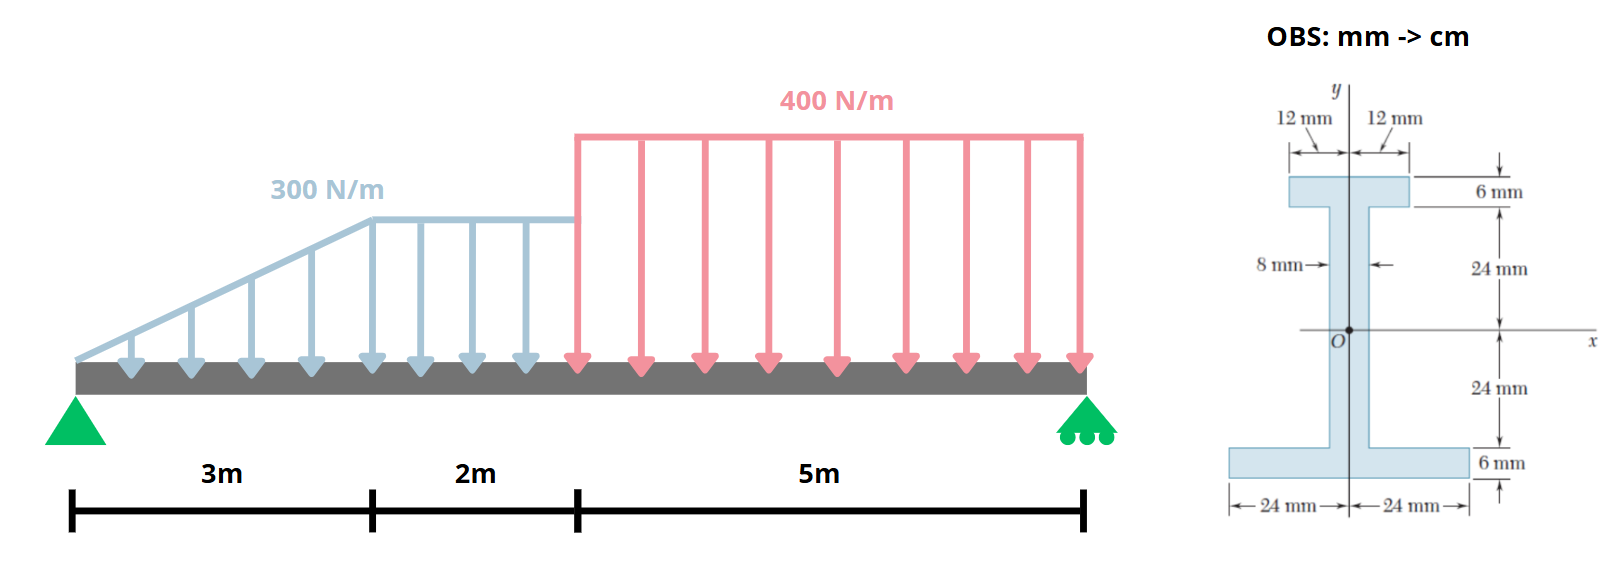

$ E = 200 GPa $

Informações da viga:

Viga:
  Comprimento: 10
  Forças: 
  Carregamentos: 
Carregamento w1:
  Início: 0
  Fim: 3
  Intensidade Inicial: 0
  Intensidade Final: -300

Carregamento w2:
  Início: 3
  Fim: 5
  Intensidade Constante: -300

Carregamento w3:
  Início: 5
  Fim: 10
  Intensidade Constante: -400

  Apoios: 
Apoio A:
  Posição: 0
  Restrições: Rx=1, Ry=1

Apoio B:
  Posição: 10
  Restrições: Rx=0, Ry=1


Reações nos apoios:
{R_Ay: 1220.00000000000, R_By: 1830.00000000000}


Compressão Máxima: 961372.17 Pa
Tensão Máxima: 1324407.82 Pa




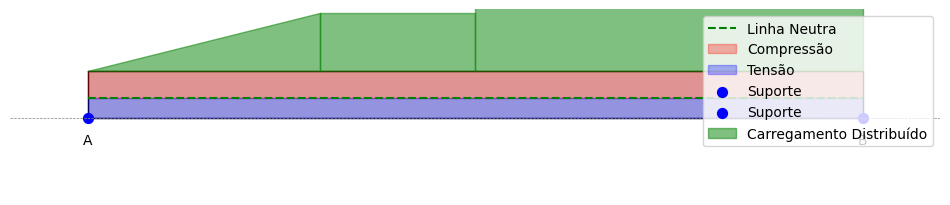

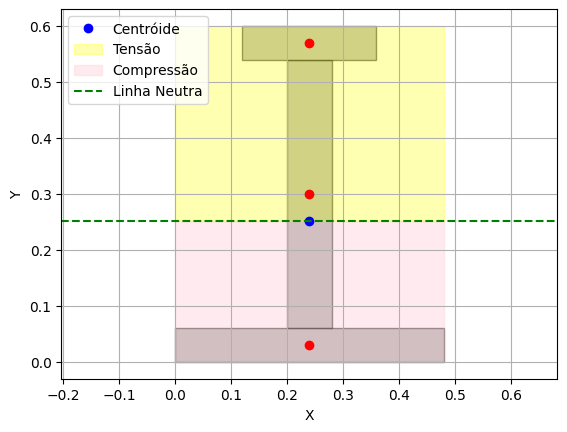

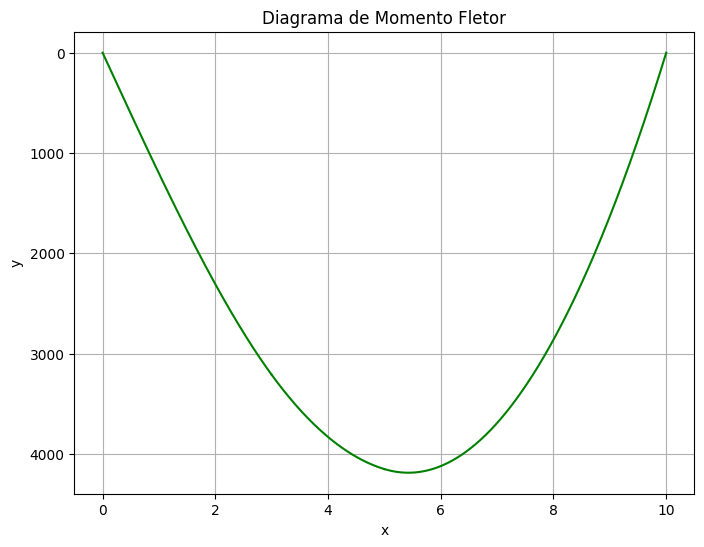

In [ ]:
# Seção Transversal
rect1 = Rectangle(0.48, 0.06, 0.24, 0.03)
rect2 = Rectangle(0.08, 0.48, 0.24, 0.30)
rect3 = Rectangle(0.24, 0.06, 0.24, 0.57)
section = CompositeSection([rect1, rect2, rect3])

# Apoios
supports = [
    Support(rx=1, ry=1, rm=0, position=0, label='A'),
    Support(rx=0, ry=1, rm=0, position=10, label='B'),
]

# Carregamentos
loads = [
    LinearLoad(start=0, end=3, label='w1', start_intensity=0, end_intensity=-300),
    ConstantLoad(start=3, end=5, label='w2', intensity=-300),
    ConstantLoad(start=5, end=10, label='w3', intensity=-400),
]

# Viga
beam = Beam(length=10, loads=loads, supports=supports, E=200e9, section=section)

# Analyze and calculate stresses
beam.analyze()
compression, tension, pos = beam.calculate_max_stresses()
beam.max_stress_info = (compression, tension, pos)

# Exibe informações
print("Informações da viga:")
print(beam)
beam.analyze()
print("====================")
print("Reações nos apoios:")
print(beam.support_reactions)
print("====================")
print("\n")

print(f"Compressão Máxima: {compression:.2f} Pa")
print(f"Tensão Máxima: {tension:.2f} Pa")
print("\n")

# Plot results
draw_beam(beam)
section.plot_section(bending_moment_sign=np.sign(compression - tension), show_stress_zones=True)

plot_analysis(beam, beam.M, 'Momento Fletor', 'green', invert=True)

___
# Exemplo 02

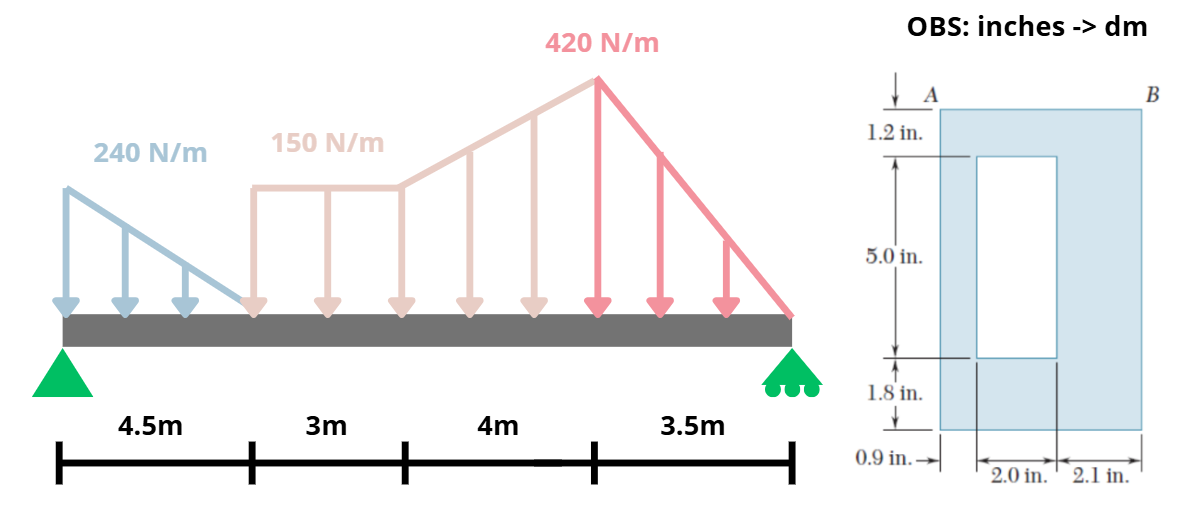

$ E = 300 GPa $

Informações da viga:

Viga:
  Comprimento: 15
  Forças: 
  Carregamentos: 
Carregamento w1:
  Início: 0
  Fim: 4.5
  Intensidade Inicial: -240
  Intensidade Final: 0

Carregamento w2:
  Início: 4.5
  Fim: 7.5
  Intensidade Constante: -150

Carregamento w3:
  Início: 7.5
  Fim: 11.5
  Intensidade Inicial: -150
  Intensidade Final: -420

Carregamento w4:
  Início: 11.5
  Fim: 15
  Intensidade Inicial: -420
  Intensidade Final: 0

  Apoios: 
Apoio A:
  Posição: 0
  Restrições: Rx=0, Ry=1

Apoio B:
  Posição: 15
  Restrições: Rx=1, Ry=1


Reações nos apoios:
{R_Ay: 1264.33333333333, R_By: 1600.66666666667}


Compressão Máxima: 316422.46 Pa
Tensão Máxima: 307070.07 Pa




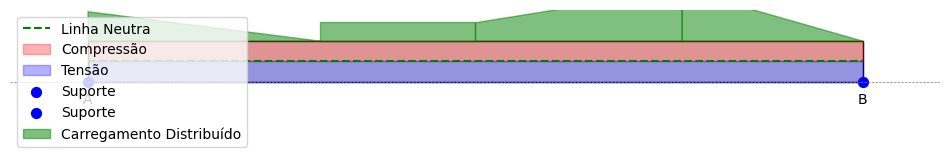

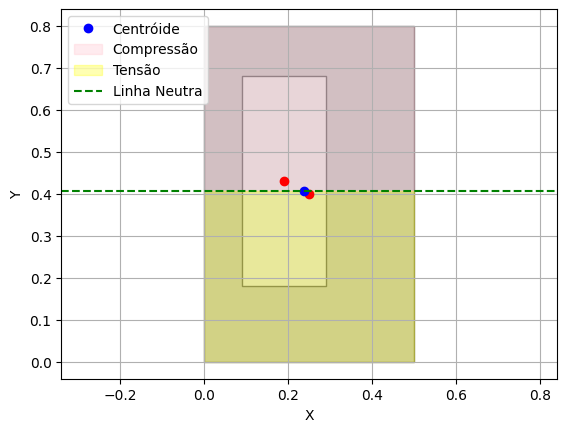

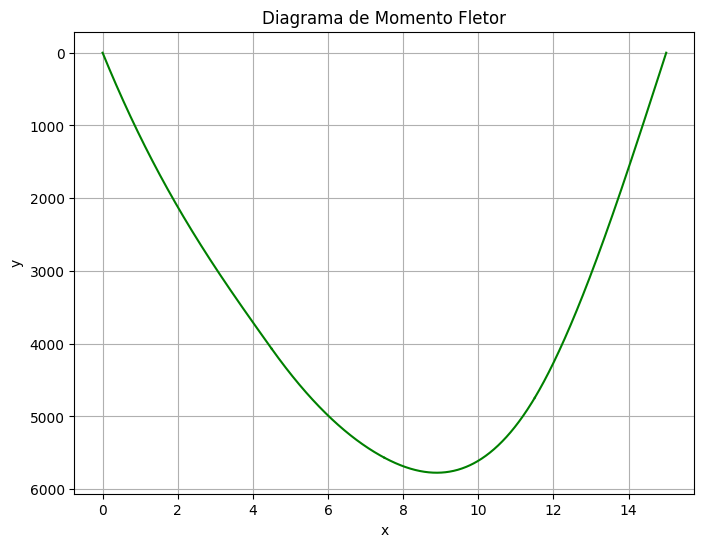

In [ ]:
# Seção Transversal
rect1 = Rectangle(0.5, 0.8, 0.25, 0.4)
rect2 = Rectangle(0.2, 0.5, 0.19, 0.43, negative=True)
section = CompositeSection([rect1, rect2])

# Apoios
supports = [
    Support(rx=0, ry=1, rm=0, position=0, label='A'),
    Support(rx=1, ry=1, rm=0, position=15, label='B'),
]

# Carregamentos
loads = [
    LinearLoad(start=0, end=4.5, label='w1', start_intensity=-240, end_intensity=0),
    ConstantLoad(start=4.5, end=7.5, label='w2', intensity=-150),
    LinearLoad(start=7.5, end=11.5, label='w3', start_intensity=-150, end_intensity=-420),
    LinearLoad(start=11.5, end=15, label='w4', start_intensity=-420, end_intensity=0),
]

# Viga
beam = Beam(length=15, loads=loads, supports=supports, E=300e9, section=section)

beam.analyze()
compression, tension, pos = beam.calculate_max_stresses()
beam.max_stress_info = (compression, tension, pos)

# Exibe informações
print("Informações da viga:")
print(beam)
beam.analyze()
print("====================")
print("Reações nos apoios:")
print(beam.support_reactions)
print("====================")
print("\n")

print(f"Compressão Máxima: {compression:.2f} Pa")
print(f"Tensão Máxima: {tension:.2f} Pa")
print("\n")

# Plot dos Resultados
draw_beam(beam)
section.plot_section(bending_moment_sign=np.sign(compression - tension), show_stress_zones=True)

plot_analysis(beam, beam.M, 'Momento Fletor', 'green', invert=True)

___
# Exemplo 03

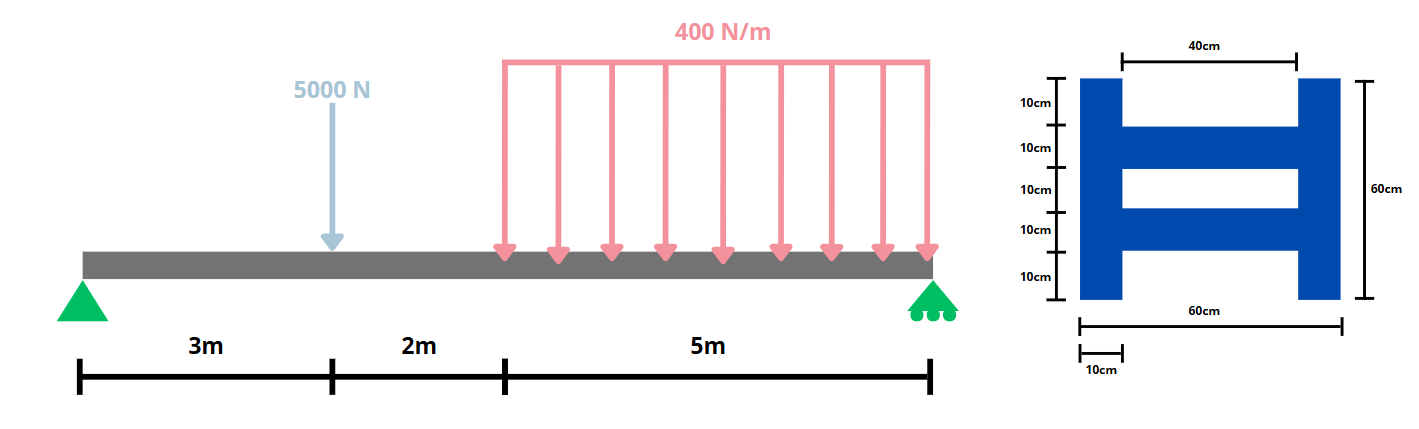

$ E = 150 GPa $

Informações da viga:

Viga:
  Comprimento: 10
  Forças: 
  Carregamentos: 
Carregamento W1:
  Início: 5
  Fim: 10
  Intensidade Constante: -400

  Apoios: 
Apoio A:
  Posição: 0
  Restrições: Rx=1, Ry=1

Apoio B:
  Posição: 10
  Restrições: Rx=0, Ry=1


Reações nos apoios:
{R_Ay: 500, R_By: 1500}


Compressão Máxima: 327225.13 Pa
Tensão Máxima: 327225.13 Pa




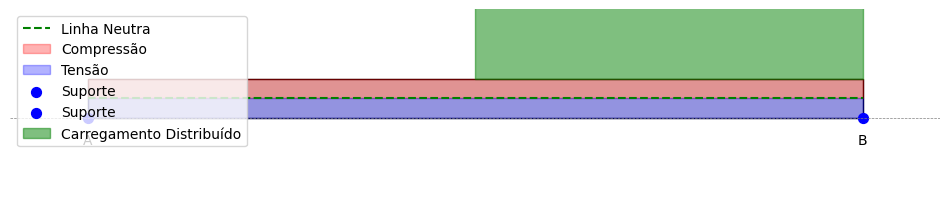

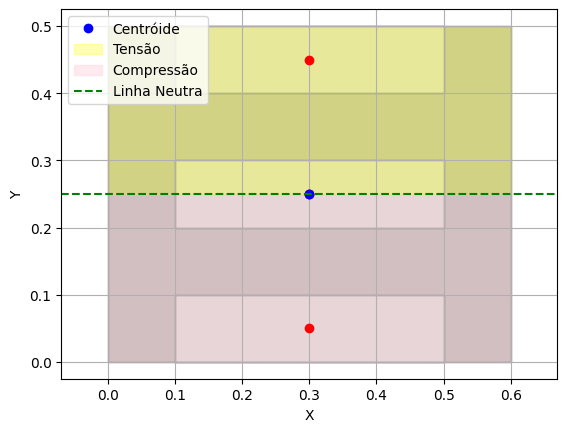

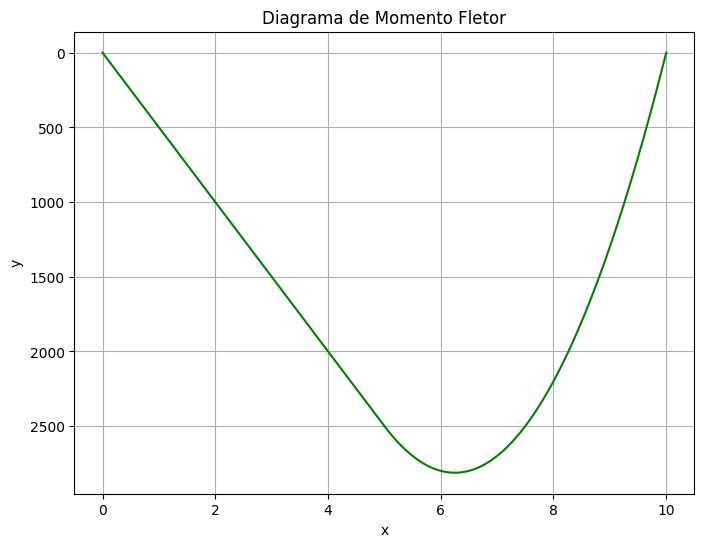

In [ ]:
# Seção Transversal
rect1 = Rectangle(0.6, 0.5, 0.3, 0.25)
rect2 = Rectangle(0.4, 0.1, 0.3, 0.05, negative=True)
rect3 = Rectangle(0.4, 0.1, 0.3, 0.25, negative=True)
rect4 = Rectangle(0.4, 0.1, 0.3, 0.45, negative=True)
section = CompositeSection([rect1, rect2, rect3, rect4])

# Apoios
supports = [
    Support(rx=1, ry=1, rm=0, position=0, label='A'),
    Support(rx=0, ry=1, rm=0, position=10, label='B'),
]

# Forças
forces = [
    Force(magnitude=-5000, position=3, label='F1'),
]

# Carregamentos
loads = [
    ConstantLoad(start=5, end=10, label='W1', intensity=-400),
]

# Viga
beam = Beam(length=10, loads=loads, supports=supports, E=1500e9, section=section)

beam.analyze()
compression, tension, pos = beam.calculate_max_stresses()
beam.max_stress_info = (compression, tension, pos)

# Exibe informações
print("Informações da viga:")
print(beam)
beam.analyze()
print("====================")
print("Reações nos apoios:")
print(beam.support_reactions)
print("====================")
print("\n")

print(f"Compressão Máxima: {compression:.2f} Pa")
print(f"Tensão Máxima: {tension:.2f} Pa")
print("\n")

# Plot dos Resultados
draw_beam(beam)
section.plot_section(bending_moment_sign=np.sign(compression - tension), show_stress_zones=True)

plot_analysis(beam, beam.M, 'Momento Fletor', 'green', invert=True)